In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../Data/JSSRawArrests.csv',encoding='ISO-8859-1',low_memory=False)
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [3]:
df.describe()

,ID,AB_RIN,Arrest_RIN,ARREST_TIME,ArrestCounty,Arrests_X,Arrest_Y,PIN,MUNICIPALITY,YOB,X_COORDINATE,Y_COORDINATE
count,204739.000000,204739.000000,204739.000000,204720.000000,164401.000000,1.641440e+05,1.641440e+05,2.047390e+05,182649.000000,204133.000000,7.174600e+04,7.174600e+04
mean,102370.000000,354252.645290,354252.645290,1300.828336,2.997926,3.148255e+06,1.693154e+06,3.237148e+08,30.311176,1980.891919,3.100268e+06,1.663698e+06
std,59103.202719,47728.324714,47728.324714,744.971583,0.110360,1.748751e+04,1.231669e+04,1.505588e+08,6.780033,12.751937,3.961758e+05,2.146687e+05
min,1.000000,252007.000000,252007.000000,0.000000,1.000000,3.049329e+06,1.648996e+06,6.583100e+04,1.000000,1900.000000,0.000000e+00,0.000000e+00
25%,51185.500000,313339.000000,313339.000000,720.000000,3.000000,3.134890e+06,1.684434e+06,1.868516e+08,31.000000,1972.000000,3.132913e+06,1.679443e+06
50%,102370.000000,358429.000000,358429.000000,1435.000000,3.000000,3.143969e+06,1.694875e+06,3.801746e+08,31.000000,1983.000000,3.144550e+06,1.692985e+06
75%,153554.500000,395757.000000,395757.000000,1930.000000,3.000000,3.156983e+06,1.701279e+06,4.581207e+08,31.000000,1991.000000,3.164154e+06,1.703144e+06
max,204739.000000,431536.000000,431536.000000,2359.000000,4.000000,3.234312e+06,1.740190e+06,4.583679e+08,62.000000,2015.000000,3.224372e+06,1.738556e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204739 entries, 0 to 204738
Data columns (total 41 columns):
ID                    204739 non-null int64
AB_RT                 204739 non-null object
AB_RIN                204739 non-null float64
ARREST_TYPE           204739 non-null object
Arrest_RIN            204739 non-null float64
ArrestPrimaryKey      204739 non-null object
ARREST_OFFICER1       203101 non-null object
ORGANIZATION          201163 non-null object
CURRENT_STATUS        204739 non-null object
RECORDS_AR_COURT_A    204648 non-null object
ARREST_REASON         204603 non-null object
ARREST_DATE           204739 non-null datetime64[ns]
ARREST_TIME           204720 non-null float64
ArrestLocation        204328 non-null object
ArrestCounty          164401 non-null float64
ArrestDistrict        164422 non-null object
ArrestsZone           164407 non-null object
YOUNG_OFFENDER        204739 non-null object
JUVENILE_STATUS       13092 non-null object
Arrests_X             16

In [5]:
df = df.drop_duplicates(subset=['ArrestPrimaryKey','PIN'])

In [6]:
year = []
month = []
for n in df['ARREST_DATE']:
    year.append(n.year)
    month.append(n.month)
df['Year'] = year
df['Month'] = month
df = df.sort_values('ARREST_DATE')
yr_mth_arr_ct = df.groupby(['Year','Month']).count()['PIN']
yr_mth_arr_ct

Year  Month
2013  1         131
      2         118
      3         148
      4         245
      5        1517
      6        2534
      7        2687
      8        3048
      9        2779
      10       2754
      11       2540
      12       2398
2014  1        2378
      2        2498
      3        3028
      4        2938
      5        2843
      6        2852
      7        2862
      8        3306
      9        3196
      10       3198
      11       2573
      12       2683
2015  1        3341
      2        2852
      3        3372
      4        3548
      5        3484
      6        3331
      7        3726
      8        3682
      9        3524
      10       3752
      11       2801
      12       2778
2016  1        3383
      2        3092
      3        1063
Name: PIN, dtype: int64

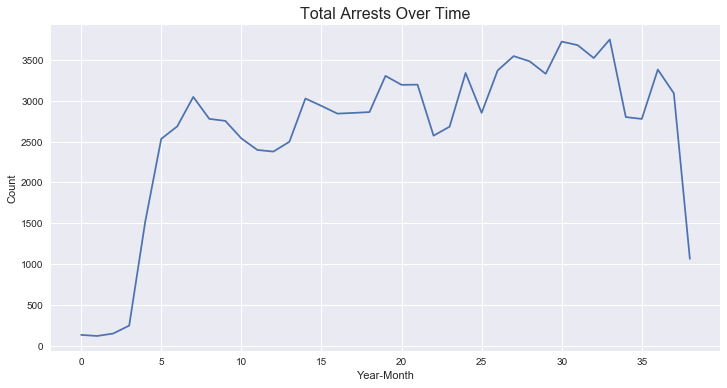

In [7]:
plt.figure(figsize=(12,6))
plt.plot(range(0,39),yr_mth_arr_ct.values)
plt.title('Total Arrests Over Time',fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Count')

In [17]:
timesArr = df.groupby('PIN').count()['ID']
unqPeople = df.drop_duplicates(subset='PIN')
unqPeople = unqPeople.sort_values(by='PIN')
# unqPeople['Times_Arrested'] = timesArr
# repClass = []
# for n in unqPeople['Times_Arrested']:
#     if n > 1:
#         repClass.append(1)
#     else:
#         repClass.append(0)
# unqPeople['Rep_Arrestee'] = repClass
timesArr
unqPeople['PIN']

68514         65831.0
73888        131336.0
73785        131349.0
28636        131374.0
23829        196878.0
92779        196903.0
29130        196929.0
97983        196941.0
41781        196958.0
57308        197126.0
40237        197127.0
91764        197161.0
36449        197175.0
37641        197196.0
35247        197203.0
84373        197204.0
68226        197253.0
87076        197254.0
50305        262419.0
6002         262427.0
70691        262443.0
57457        262462.0
75138        327946.0
43441        327956.0
64213        327957.0
50898        327996.0
60287        328008.0
58033        328046.0
51567        328057.0
25334        328065.0
             ...     
102870    458367349.0
102890    458367351.0
102868    458367391.0
102219    458367527.0
102968    458367547.0
102941    458367550.0
102851    458367602.0
102966    458367623.0
102949    458367627.0
102960    458367646.0
102956    458367651.0
102953    458367665.0
102962    458367666.0
102938    458367681.0
102911    

In [9]:
df = df.merge(unqPeople[['PIN','Rep_Arrestee']],on='PIN')

In [10]:
df[['PIN','Rep_Arrestee']].sort_values('PIN').head(10)

,PIN,Rep_Arrestee
68514,65831.0,1
68515,65831.0,1
68516,65831.0,1
73888,131336.0,0
73785,131349.0,0
28636,131374.0,0
23830,196878.0,1
23831,196878.0,1
23832,196878.0,1
23833,196878.0,1


In [11]:
unqPeople[['PIN','Rep_Arrestee']]

,PIN,Rep_Arrestee
99550,65831.0,1
114073,131336.0,0
113740,131349.0,0
26761,131374.0,0
20086,196878.0,1
167296,196903.0,1
27435,196929.0,0
185077,196941.0,0
47959,196958.0,0
76265,197126.0,0


In [12]:
monthRepAvg = df.groupby(['Year','Month']).mean()['Rep_Arrestee']
monthRepAvg

Year  Month
2013  1        0.610687
      2        0.576271
      3        0.500000
      4        0.538776
      5        0.486486
      6        0.546567
      7        0.542240
      8        0.555118
      9        0.541922
      10       0.558824
      11       0.537008
      12       0.539616
2014  1        0.526493
      2        0.528823
      3        0.559445
      4        0.524847
      5        0.542033
      6        0.576438
      7        0.559399
      8        0.549607
      9        0.572591
      10       0.544715
      11       0.523125
      12       0.554976
2015  1        0.556720
      2        0.562763
      3        0.583037
      4        0.548478
      5        0.554535
      6        0.578205
      7        0.549651
      8        0.563009
      9        0.545970
      10       0.564232
      11       0.536951
      12       0.541397
2016  1        0.535915
      2        0.518111
      3        0.543744
Name: Rep_Arrestee, dtype: float64

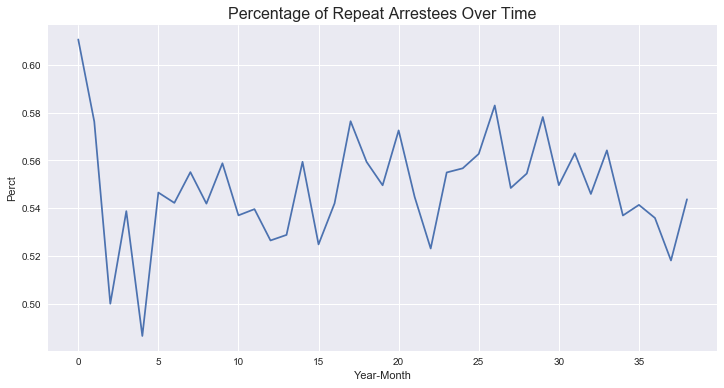

In [13]:
plt.figure(figsize=(12,6))
plt.plot(range(0,39),monthRepAvg.values)
plt.title('Percentage of Repeat Arrestees Over Time',fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Perct')